<a href="https://colab.research.google.com/github/pepemesquita/h2ia/blob/main/Iris_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import random

[Dataset Iris - Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [37]:
seed = 42
random.seed(seed)

In [38]:
dataset = load_iris()
dataset_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
dataset_df['target'] = dataset.target

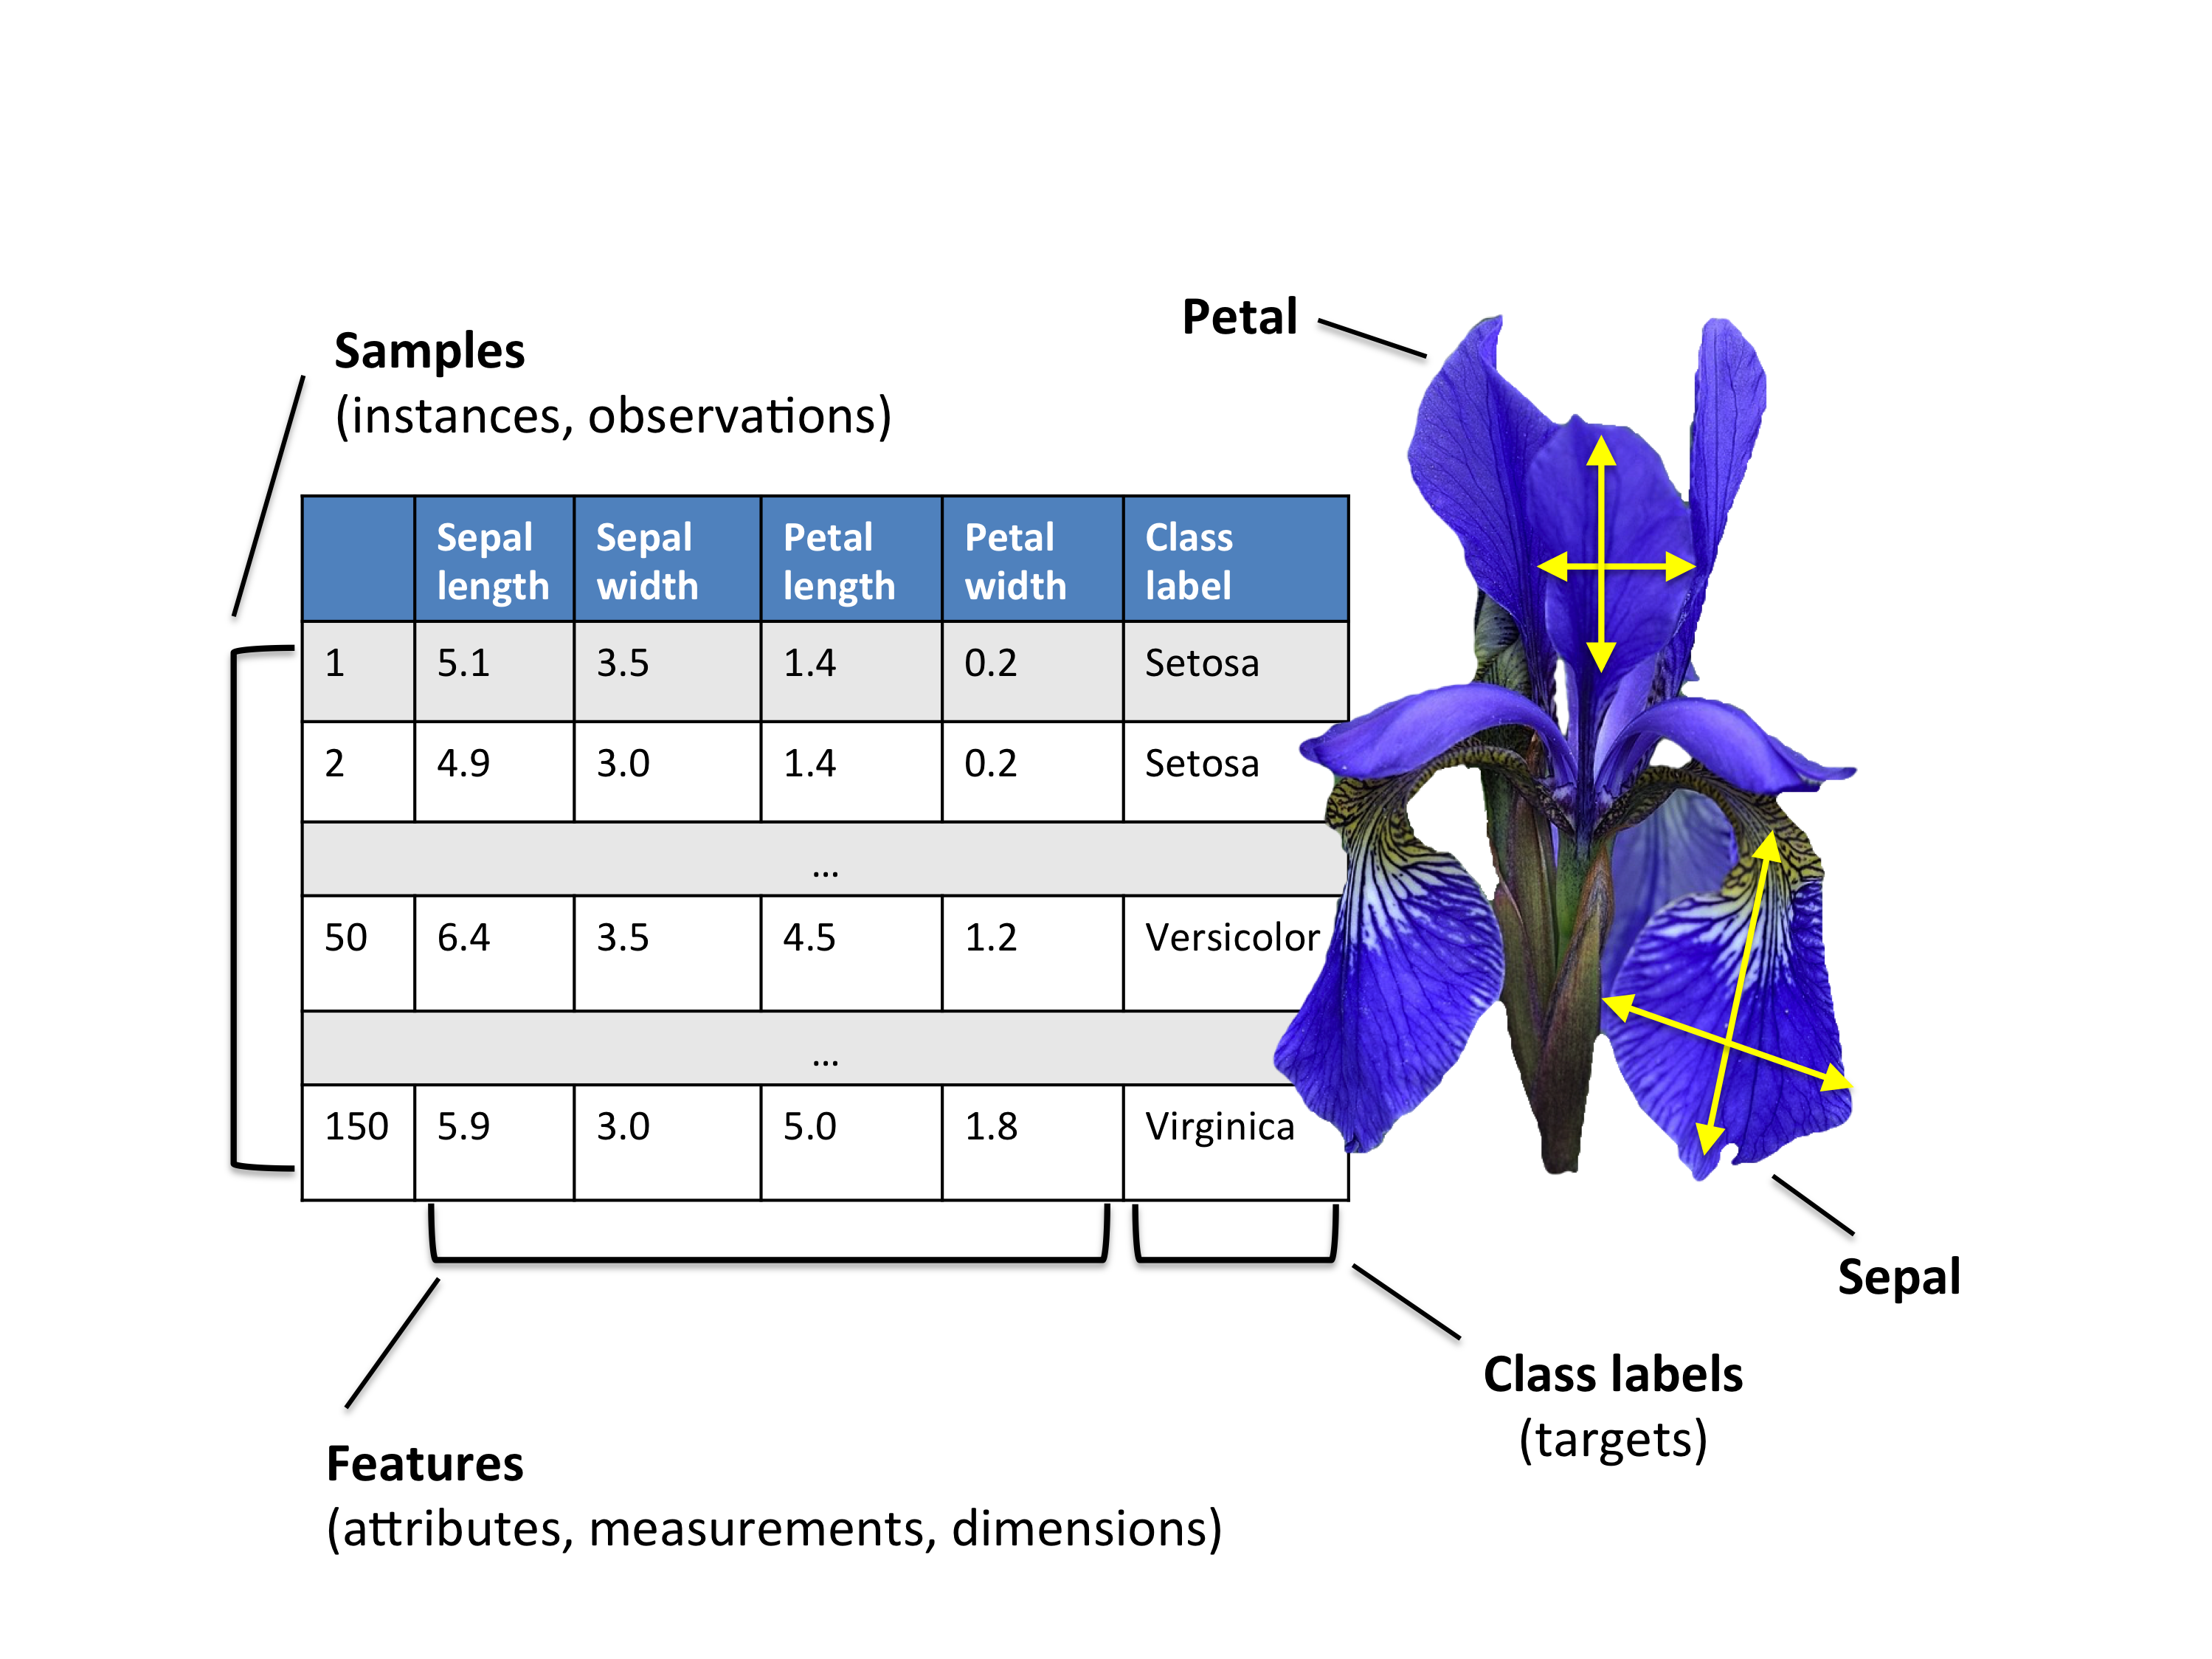

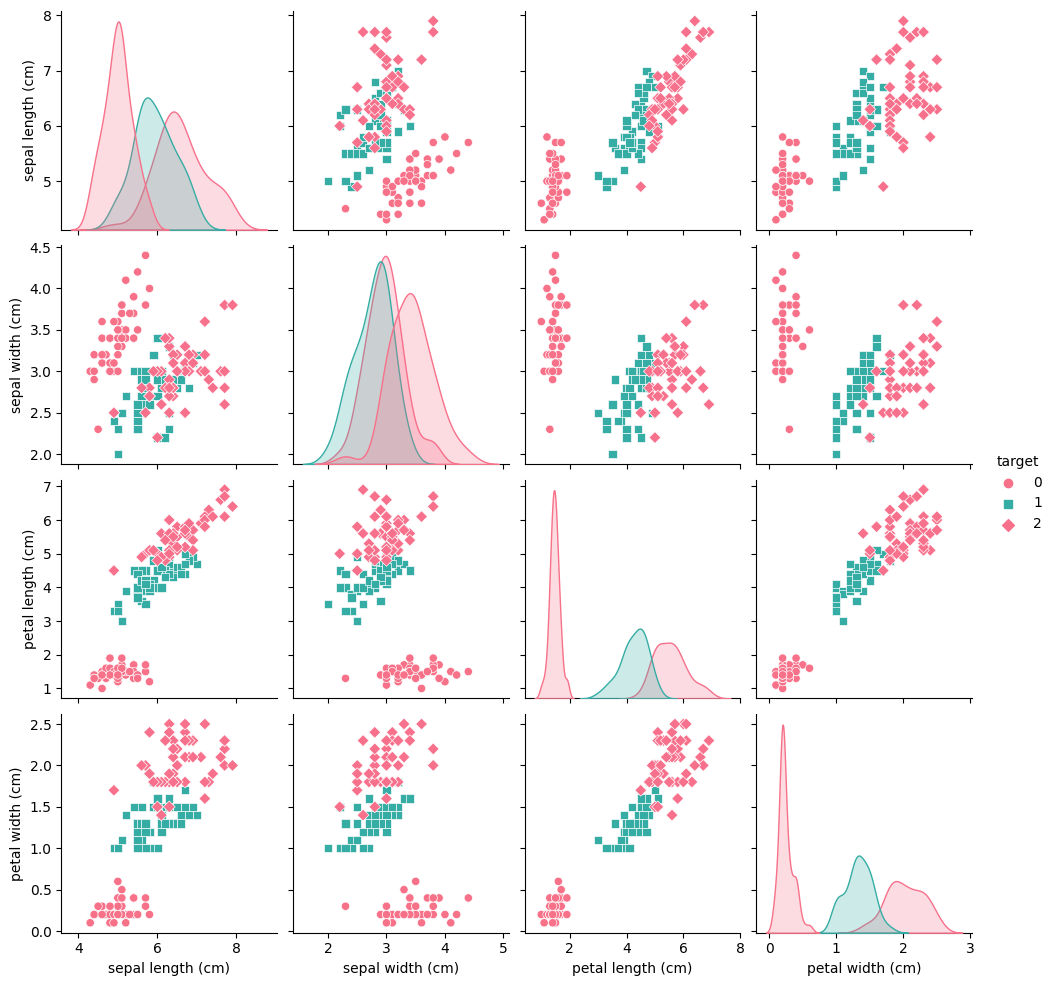

In [39]:
sns.pairplot(dataset_df, hue="target", palette="husl", markers=["o", "s", "D"])

In [40]:
novo_dataset_df = dataset_df[['sepal length (cm)','sepal width (cm)', 'target']]

In [41]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
novo_dataset_df = novo_dataset_df[~(novo_dataset_df.target == 1)]

In [43]:
novo_dataset_df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


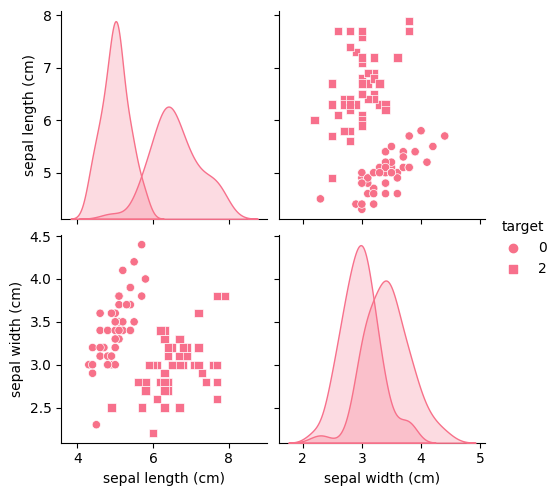

In [44]:
sns.pairplot(novo_dataset_df, hue= 'target', palette="husl", markers=["o", "s"])

In [45]:
novo_dataset_df.target = novo_dataset_df.target.map({0:'setosa', 2:'virginica'})

In [46]:
novo_dataset_df = novo_dataset_df.sample(frac = 1)

In [47]:
novo_dataset_df

,sepal length (cm),sepal width (cm),target
148,6.2,3.4,virginica
122,7.7,2.8,virginica
135,7.7,3.0,virginica
121,5.6,2.8,virginica
109,7.2,3.6,virginica
...,...,...,...
15,5.7,4.4,setosa
141,6.9,3.1,virginica
140,6.7,3.1,virginica
47,4.6,3.2,setosa


In [48]:
novo_dataset_df.columns = [c.replace(' ', '_') for c in novo_dataset_df]
novo_dataset_df.columns = [c.lstrip() for c in novo_dataset_df]
novo_dataset_df.columns = [c.rstrip() for c in novo_dataset_df]
novo_dataset_df

,sepal_length_(cm),sepal_width_(cm),target
148,6.2,3.4,virginica
122,7.7,2.8,virginica
135,7.7,3.0,virginica
121,5.6,2.8,virginica
109,7.2,3.6,virginica
...,...,...,...
15,5.7,4.4,setosa
141,6.9,3.1,virginica
140,6.7,3.1,virginica
47,4.6,3.2,setosa


In [49]:
novo_dataset_df.to_csv("dataset_iris_simplificado.csv")

In [50]:
!cp "dataset_iris_simplificado.csv" "/content/drive/MyDrive/Formação/Aprendizado de Máquina/Iris"

cp: cannot create regular file '/content/drive/MyDrive/Formação/Aprendizado de Máquina/Iris': No such file or directory


# Tarefa

### Criar um classificador linear para classificar espécimes de flores da Iris em duas classes (setosa e virginica) a partir dos atributos comprimento e largura da sépala.

In [51]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [52]:
from pandas.plotting import scatter_matrix

sepal_len = iris['data'][:100,0]
sepal_wid = iris['data'][:100,1]
labels = iris['target'][:100]

In [53]:
sepal_len -= np.mean(sepal_len)
sepal_wid -= np.mean(sepal_wid)

In [54]:
import sklearn.linear_model
model = sklearn.linear_model.LogisticRegression(fit_intercept=False)
model.fit(np.stack([sepal_len, sepal_wid], axis=1),
          labels)

LogisticRegression(fit_intercept=False)

In [55]:
def plot_sep(w1, w2, color='green'):
    '''
    Plot decision boundary hypothesis 
      w1 * sepal_len + w2 * sepal_wid = 0
    in input space, highlighting the hyperplane
    '''
    plt.scatter(sepal_len, 
                sepal_wid,
                c=labels,
                cmap=plt.cm.Paired)
    plt.title("Separation in Input Space")
    plt.ylim([-1.5,1.5])
    plt.xlim([-1.5,2])
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    if w2 != 0:
        m = -w1/w2
        t = 1 if w2 > 0 else -1
        plt.plot(
            [-1.5,2.0], 
            [-1.5*m, 2.0*m], 
            '-y', 
            color=color)
        plt.fill_between(
            [-1.5, 2.0],
            [m*-1.5, m*2.0],
            [t*1.5, t*1.5],
            alpha=0.2,
            color=color)
    if w2 == 0: # decision boundary is vertical
        t = 1 if w1 > 0 else -1
        plt.plot([0, 0],
                 [-1.5, 2.0],
                 '-y',
                color=color)
        plt.fill_between(
            [0, 2.0*t],
            [-1.5, -2.0],
            [1.5, 2],
            alpha=0.2,
            color=color)

In [56]:
model.coef_

array([[ 3.02236435, -3.04229316]])

<ipython-input-55-79f3434f02a2>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot(


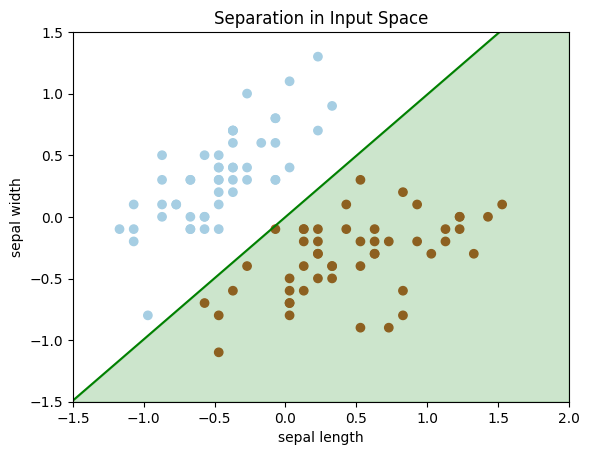

In [57]:
plot_sep(3.02236435, -3.04229316)